In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe(include = 'all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

no null values

In [6]:
#let us get the unique values of the categorical columns
cate_cols = df.select_dtypes(include=['object']).columns
for col in cate_cols:
    print(df[col].value_counts())

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Occupation
 Prof-specialty       4140
 Craft-repair 

There are certain '?' values, removing them and replacing them with NaN

In [7]:
#leading or trailing whitespaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
#replacing '?' values with Nan
df.replace({'?': np.nan}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

The '?' is now replaced with null values.

All the columns with null values are of object type, hence replacing them with the mode

In [11]:
cols = ['Workclass', 'Occupation', 'Native_country']
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<Axes: xlabel='Income', ylabel='count'>

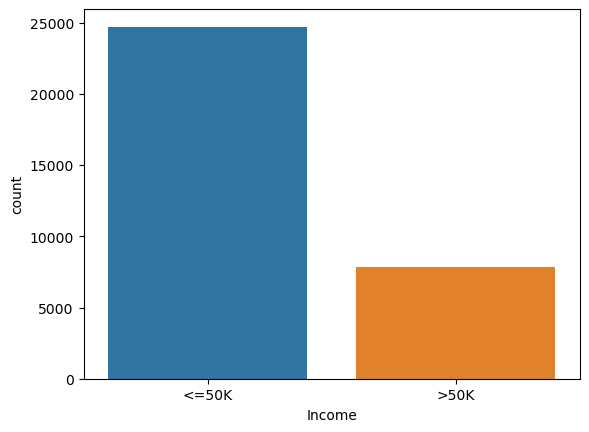

In [14]:
sns.countplot(x = 'Income', data = df)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fnlwgt'}>],
       [<Axes: title={'center': 'Education_num'}>,
        <Axes: title={'center': 'Capital_gain'}>],
       [<Axes: title={'center': 'Capital_loss'}>,
        <Axes: title={'center': 'Hours_per_week'}>]], dtype=object)

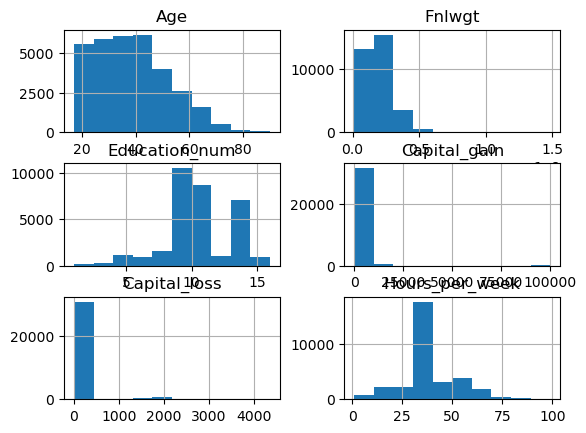

In [15]:
df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].hist()

In [16]:
cate_cols = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

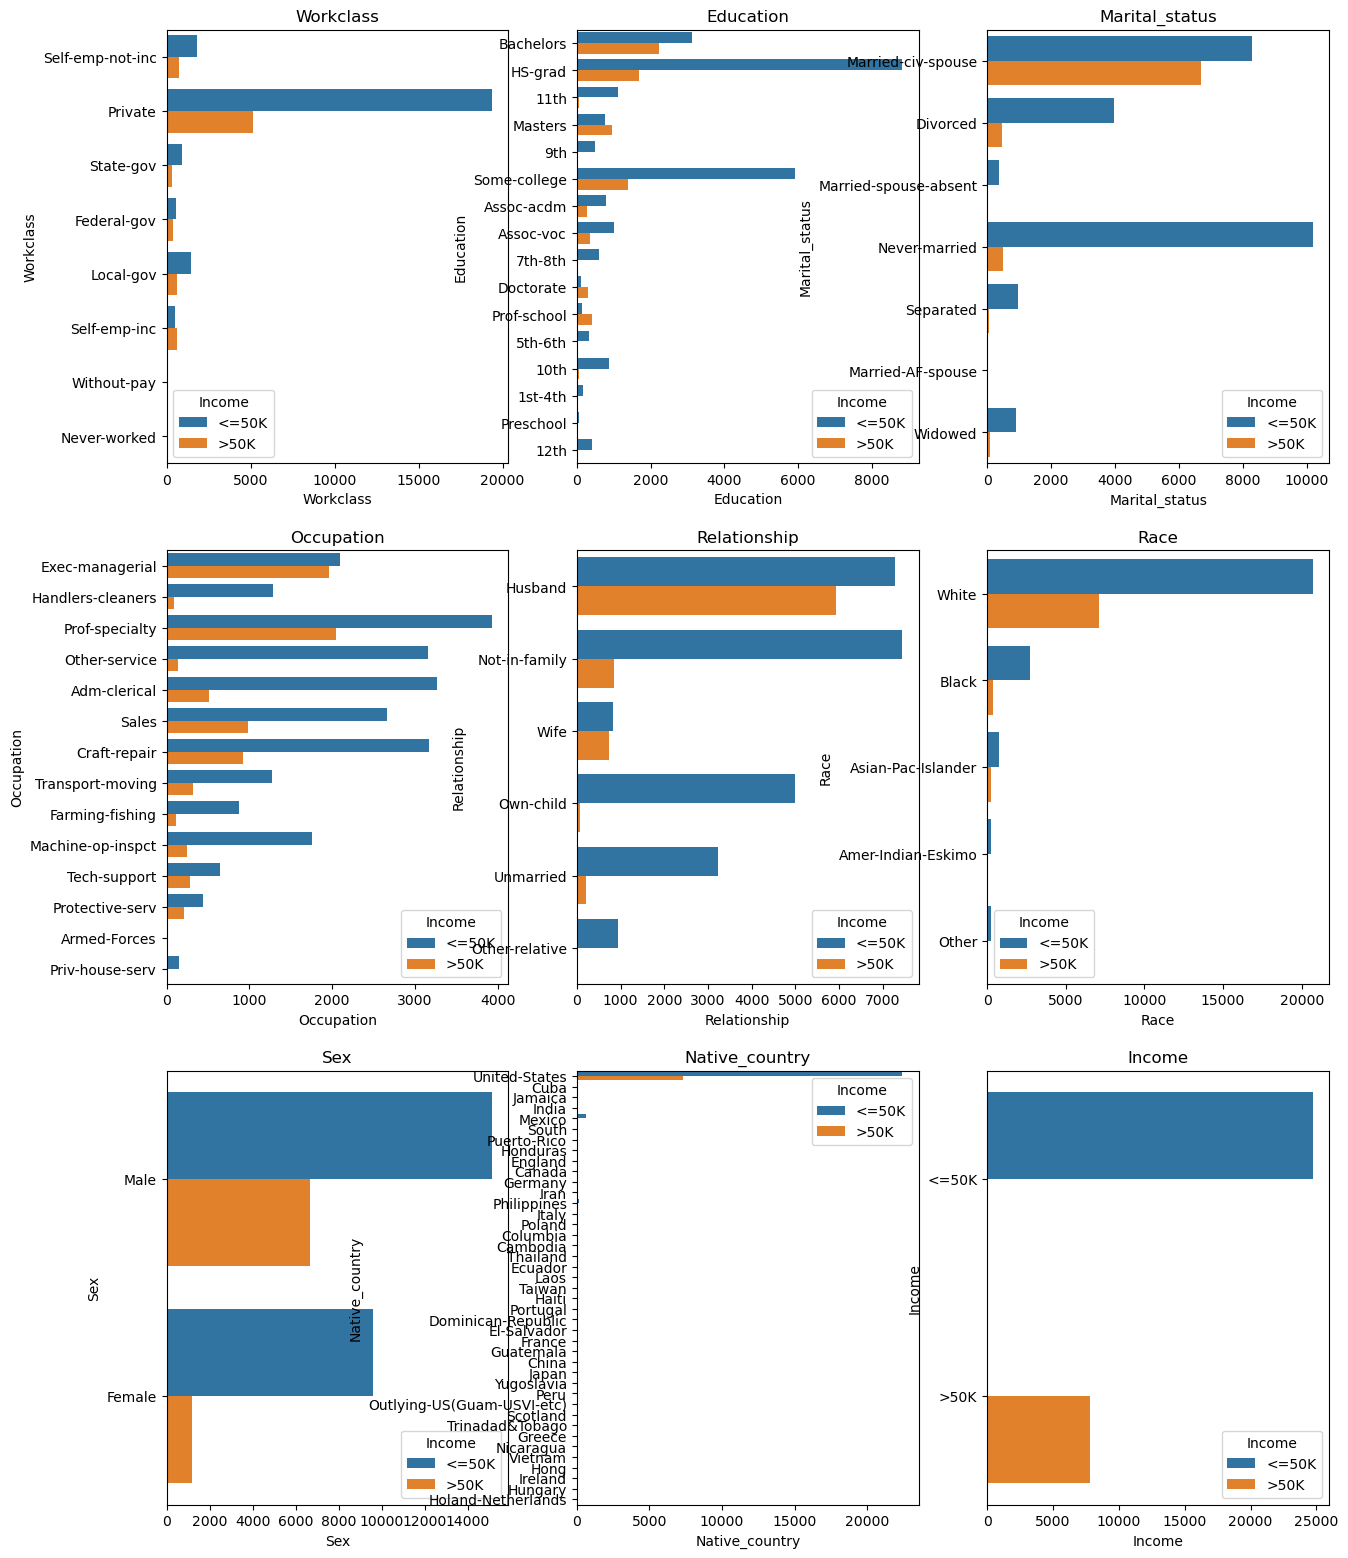

In [17]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cate_col in cate_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cate_col,data=df, hue = 'Income')
    plt.xlabel(cate_col)
    plt.title(cate_col)
    plotnumber+=1
plt.show()

In [18]:
#converting age into categorical variables
df['Age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [19]:
df['Age'] = pd.cut(df['Age'], bins = [17, 35, 55, 100], labels = ['Young', 'Middle_Age', 'Old'])

<Axes: xlabel='Age', ylabel='count'>

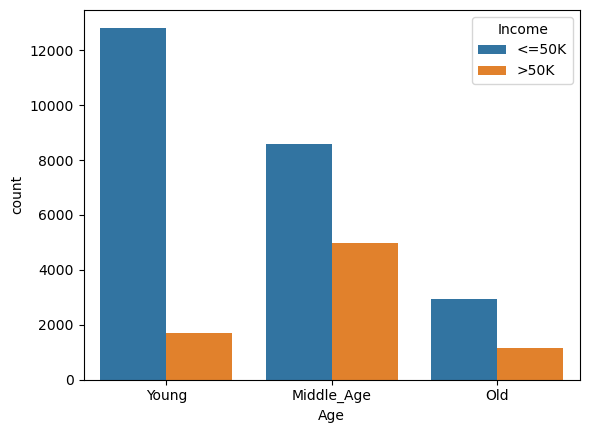

In [20]:
sns.countplot(x='Age', data = df, hue = 'Income')

In [21]:
df['Race'].unique()
df['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

<Axes: xlabel='Race', ylabel='count'>

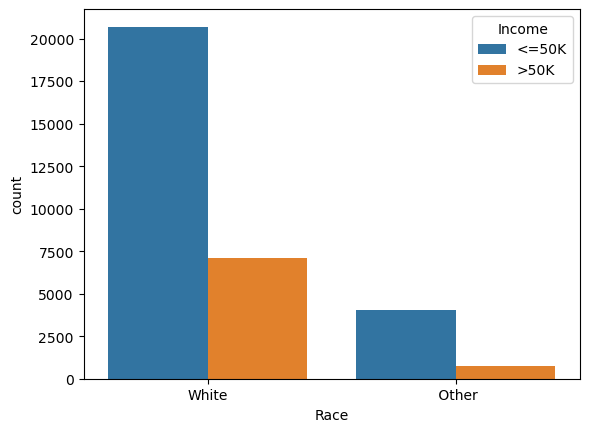

In [22]:
sns.countplot(x='Race', data = df, hue = 'Income')

In [23]:
df['Native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [24]:
df['Native_country'].replace(['Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'],' Other', inplace = True)

<Axes: xlabel='Native_country', ylabel='count'>

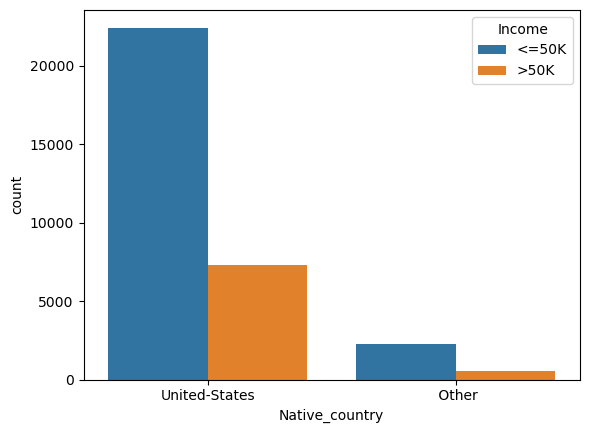

In [25]:
sns.countplot(x='Native_country', data = df, hue = 'Income')

In [26]:
df['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [27]:
df['Education'].replace(['11th','9th','7th-8th','5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School', inplace = True)

<Axes: xlabel='count', ylabel='Education'>

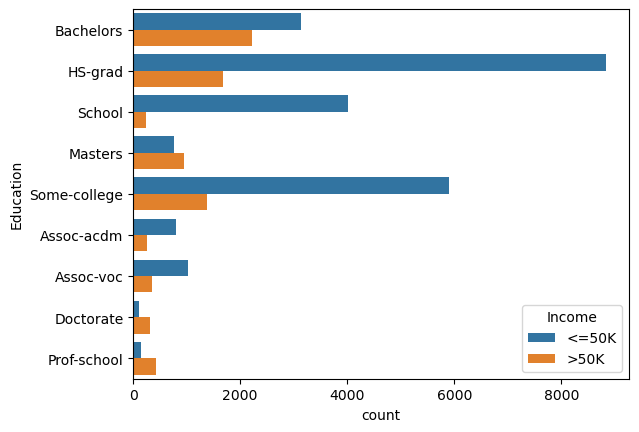

In [28]:
sns.countplot(y='Education', data = df, hue = 'Income')

In [29]:
df['Capital_diff'] = df['Capital_gain'] - df['Capital_loss']

In [30]:
df.drop(['Capital_gain','Capital_loss'], axis = 1, inplace = True)

In [31]:
df['Capital_diff'].describe()

count    32560.000000
mean       990.308661
std       7409.097824
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_diff, dtype: float64

In [32]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital_diff
0,Middle_Age,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
1,Middle_Age,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
2,Middle_Age,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,<=50K,0
3,Young,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,<=50K,0
4,Middle_Age,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,0


In [33]:
df['Hours_per_week'].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

In [34]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital_diff
0,Middle_Age,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
1,Middle_Age,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
2,Middle_Age,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,<=50K,0
3,Young,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,<=50K,0
4,Middle_Age,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,0


In [35]:
#make a count plot of Income(for balancing the dataset)

In [36]:
X = df.drop(['Income'], axis = 1)
Y = df['Income']

In [37]:
X.select_dtypes(include='number').columns

Index(['Fnlwgt', 'Education_num', 'Hours_per_week', 'Capital_diff'], dtype='object')

In [38]:
cat_cols = X.select_dtypes(include='object').columns

In [39]:
cat_cols

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

In [40]:
X.shape

(32560, 13)

In [41]:
from sklearn import preprocessing

for col in ['Age','Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country']:
        le = preprocessing.LabelEncoder()
        X[col] = le.fit_transform(X[col])       

In [42]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital_diff
0,0,5,83311,2,13,2,3,0,1,1,13,1,0
1,0,3,215646,4,9,0,5,1,1,1,40,1,0
2,0,3,234721,7,7,2,5,0,0,1,40,1,0
3,2,3,338409,2,13,2,9,5,0,0,40,0,0
4,0,3,284582,5,14,2,3,5,1,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,2,3,257302,0,12,2,12,5,1,0,38,1,0
32556,0,3,154374,4,9,2,6,0,1,1,40,1,0
32557,1,3,151910,4,9,6,0,4,1,0,40,1,0
32558,2,3,201490,4,9,4,0,3,1,1,20,1,0


In [43]:
df['Income'].value_counts()

Income
<=50K    24719
>50K      7841
Name: count, dtype: int64

In [44]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital_diff
0,0,5,83311,2,13,2,3,0,1,1,13,1,0
1,0,3,215646,4,9,0,5,1,1,1,40,1,0
2,0,3,234721,7,7,2,5,0,0,1,40,1,0
3,2,3,338409,2,13,2,9,5,0,0,40,0,0
4,0,3,284582,5,14,2,3,5,1,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,2,3,257302,0,12,2,12,5,1,0,38,1,0
32556,0,3,154374,4,9,2,6,0,1,1,40,1,0
32557,1,3,151910,4,9,6,0,4,1,0,40,1,0
32558,2,3,201490,4,9,4,0,3,1,1,20,1,0


In [45]:
Y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: Income, Length: 32560, dtype: object

In [46]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 52)

In [47]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [48]:
X_train.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital_diff
0,-1.107518,-0.081350,-1.395884,-0.321030,-0.425235,-1.736907,-1.541062,1.592319,0.414491,-1.422027,-0.031337,0.3092,-0.134232
1,-1.107518,-0.081350,-0.168441,-0.321030,-0.425235,-1.736907,0.217154,-0.276563,-2.412599,-1.422027,-0.840792,0.3092,-0.134232
2,-1.107518,-0.081350,2.522838,0.092592,1.529813,-0.408440,-1.541062,-0.899524,0.414491,0.703222,-0.031337,0.3092,-0.134232
3,0.992626,2.626056,-0.219432,0.092592,1.529813,0.920028,0.719502,-0.276563,0.414491,0.703222,-2.216865,0.3092,-0.134232
4,0.992626,-0.081350,0.189030,-0.321030,-0.425235,0.920028,-1.038714,-0.276563,0.414491,0.703222,0.616227,0.3092,-0.134232


In [49]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [50]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [51]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [52]:
#Applying the GaussianNB algorithm

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [53]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [54]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [55]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [56]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
99.98,Random Forest
99.98,Decision Tree
89.42,KNN
82.84,Naive Bayes
82.59,Logistic Regression
82.56,Support Vector Machines


In [57]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fnlwgt,0.252
Capital_diff,0.150
Hours_per_week,0.096
Education_num,0.094
Relationship,0.094
Marital_status,0.088
Occupation,0.074
Workclass,0.045
Age,0.041


<Axes: xlabel='feature'>

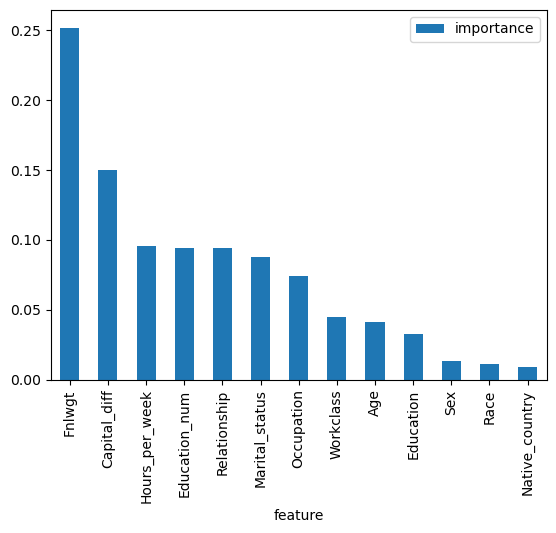

In [58]:
#Plotting the significance of each feautre

importances.plot.bar()

In [59]:
#Since Sex, Race and Native_country hardly have any significance,we drop these columns to avoid overfitting

X  = X.drop(['Sex','Race','Native_country'], axis=1)

In [60]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Capital_diff
0,0,5,83311,2,13,2,3,0,13,0
1,0,3,215646,4,9,0,5,1,40,0
2,0,3,234721,7,7,2,5,0,40,0
3,2,3,338409,2,13,2,9,5,40,0
4,0,3,284582,5,14,2,3,5,40,0
...,...,...,...,...,...,...,...,...,...,...
32555,2,3,257302,0,12,2,12,5,38,0
32556,0,3,154374,4,9,2,6,0,40,0
32557,1,3,151910,4,9,6,0,4,40,0
32558,2,3,201490,4,9,4,0,3,20,0


In [61]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [62]:
acc_decision_tree

99.98